In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
local_client_TT_path = 'output/local_client_TT.txt'
local_server_TT_path  = 'output/local_server_TT.txt'

In [22]:
local_client_TT = pd.read_csv(local_client_TT_path, sep=',', header=None, names=['id', 't1_client', 't2_client'])
local_server_TT = pd.read_csv(local_server_TT_path, sep=',', header=None, names=['id', 't1_server', 't2_server'])

local_TT = pd.merge(local_client_TT, local_server_TT, on='id')

In [23]:
local_TT['t1'] = local_TT['t1_server'] - local_TT['t1_client']

local_TT['t2'] = local_TT['t2_client'] - local_TT['t2_server']

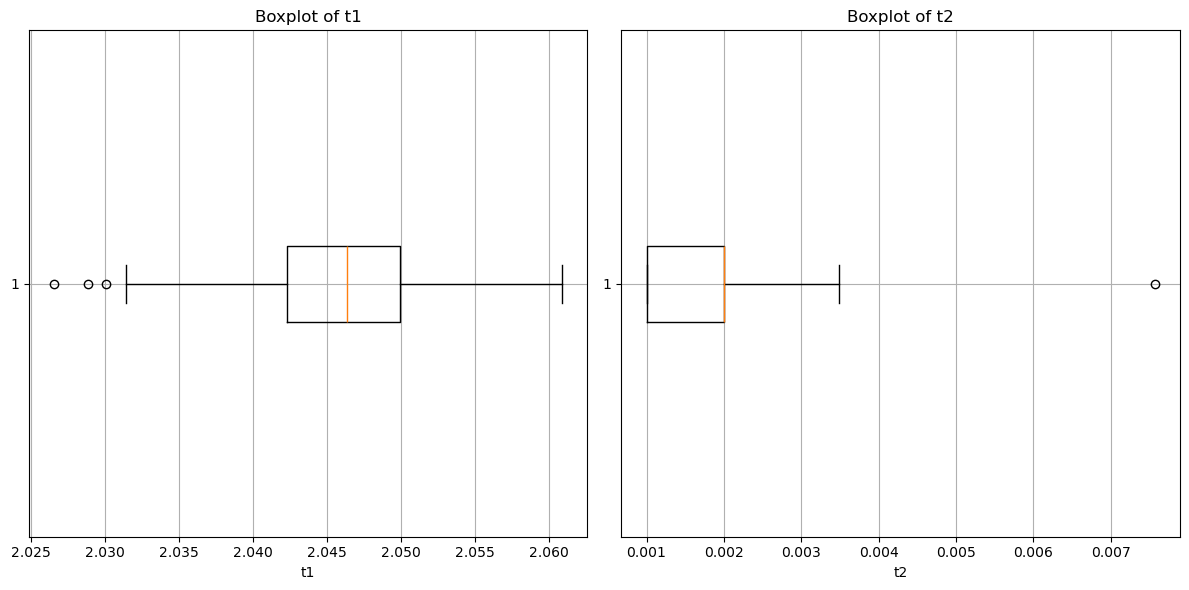

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(local_TT['t1'], vert=False)
plt.title('Boxplot of t1')
plt.xlabel('t1')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(local_TT['t2'], vert=False)
plt.title('Boxplot of t2')
plt.xlabel('t2')
plt.grid(True)

plt.tight_layout()
plt.show()